In [368]:
from scipy.io import loadmat
import numpy as np
import nibabel as nib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
mpc_mat = loadmat('./cingulate_mat/MPC.mat')
mpc = mpc_mat['MPC2']
cingulatefs5_mask = loadmat('./cingulate_mat/cingulate_maskfsa5.mat')
economo_mask = loadmat('./cingulate_mat/voneconomo.mat')
schaefer1000 = nib.load("Schaefer2018_1000Parcels_7Networks_order.dscalar.nii")
intensities = loadmat('I.mat')
meanMPC = np.squeeze(np.mean(mpc,1))
cingulate_gradients = loadmat('./cingulate_gradients.mat')
cingulate_gradients = cingulate_gradients['cingulate_gradients']
cingulate_gradients = cingulate_gradients.transpose()



cingulate_map_raw = [41,123,270,271,272,273,274,276,277,278,371,372,428,435,443,467,469,470,471,473,476,477,479,481,482,484,485,486,487,490,492,626,792,793,794,796,797,798,799,800,908,909,958,961,963,982,983,986,988,991,992,993,994,999,1000]
cingulate_map = [i-1 for i in cingulate_map_raw]


In [130]:
G1 = pd.DataFrame(cingulate_gradients[0], index=cingulate_map)
G2 = pd.DataFrame(cingulate_gradients[1], index=cingulate_map)
##G1 = G1.transpose()
#print(G1)

In [347]:
intensities_1000 = pd.DataFrame(intensities['I2'][0])
intensities_cingulate = intensities_1000.iloc[:,cingulate_map]


qc_G1=pd.qcut(G1[0], q=14, precision=1) # cuts data into 12 bins with equally numbered data points
bins_G1 = qc_G1.cat.categories
codes_G1 = qc_G1.cat.codes

df_G1 = pd.concat([G1,codes_G1], axis=1)
df_G1.columns = ["gradient_intensity", "bin"]
df_G1['region'] = ''
df_G1.region[df_G1['bin']<=3] = 'anterior'
df_G1.region[(df_G1['bin']>3) & (df_G1['bin']<9)] = 'intermediate'
df_G1.region[df_G1['bin']>=9] = 'posterior'
df_G1 = pd.concat([df_G1, intensities_cingulate.mean().transpose()], axis=1)
df_G1 = pd.concat([df_G1, intensities_cingulate.std().transpose()], axis=1)
df_G1 = pd.concat([df_G1, intensities_cingulate.skew().transpose()], axis=1)
df_G1 = pd.concat([df_G1, intensities_cingulate.kurtosis().transpose()], axis=1)
df_G1.columns = ["gradient_intensity", "bin", "region", 
    "wm_intensity_mean", "wm_intensity_std", "wm_intensity_skew", "wm_intensity_kurtosis"]

intensities_trans = intensities_cingulate.transpose()
surf_intensities_merge = pd.concat([intensities_trans, df_G1['region']], axis=1)
anterior_inten = surf_intensities_merge[surf_intensities_merge['region'] == 'anterior']
posterior_inten = surf_intensities_merge[surf_intensities_merge['region'] == 'posterior']
intermediate_inten = surf_intensities_merge[surf_intensities_merge['region'] == 'intermediate']

regional_inten = pd.DataFrame([anterior_inten.mean(), posterior_inten.mean(), intermediate_inten.mean()], index=['anterior', 'posterior', 'intermediate'])
regional_inten_trans = regional_inten.transpose()
regional_inten_trans.reset_index(inplace=True)
regional_inten_trans = regional_inten_trans.rename(columns = {'index':'surface'})


/var/folders/w3/80xb185904n9527_z14hcsh00000gn/T/ipykernel_56916/2978468874.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_G1.region[df_G1['bin']<=3] = 'anterior'
/var/folders/w3/80xb185904n9527_z14hcsh00000gn/T/ipykernel_56916/2978468874.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_G1.region[(df_G1['bin']>3) & (df_G1['bin']<9)] = 'intermediate'
/var/folders/w3/80xb185904n9527_z14hcsh00000gn/T/ipykernel_56916/2978468874.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [378]:
fig, axes = plt.subplots(2,3, figsize=(20,8))
sns.kdeplot(ax=axes[0,0], data=df_G1, x="gradient_intensity", hue='bin', cbar=True)
axes[0,0].set_xlabel("Gradient Intensity")
sns.kdeplot(ax=axes[0,1], data=df_G1, x="gradient_intensity", hue='region')
axes[0,1].set_xlabel("Gradient Intensity")
axes[0,1].legend_ = None
sns.kdeplot(ax=axes[0,2], data=df_G1, x="wm_intensity_mean", hue='region')
axes[0,2].set_xlabel("WM Intensity Mean")
sns.kdeplot(ax=axes[1,0], data=df_G1, x="wm_intensity_std", hue='region')
axes[1,0].set_xlabel("WM Intensity SD")
axes[1,0].legend_ = None
sns.kdeplot(ax=axes[1,1], data=df_G1, x="wm_intensity_skew", hue='region')
axes[1,1].set_xlabel("WM Intensity Skew")
axes[1,1].legend_ = None
sns.kdeplot(ax=axes[1,2], data=df_G1, x="wm_intensity_kurtosis", hue='region')
axes[1,2].set_xlabel("WM Intensity Kurtosis")
axes[1,2].legend_ = None

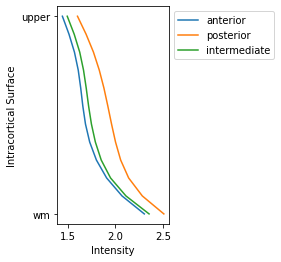

In [338]:
fig = plt.figure(figsize=(2,4))
ax1= sns.lineplot(x=regional_inten_trans['anterior'], y=regional_inten_trans['surface'])
ax1= sns.lineplot(x=regional_inten_trans['posterior'], y=regional_inten_trans['surface'])
ax1= sns.lineplot(x=regional_inten_trans['intermediate'], y=regional_inten_trans['surface'])
ax1.invert_yaxis()
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Intracortical Surface')
ax1.set_yticks([0,11])
ax1.set_yticklabels(["upper", "wm"])
ax1.legend(['anterior', 'posterior', 'intermediate'],bbox_to_anchor=(1,1), loc="upper left")

